# Random Forest Regression


## Importing the necessary Libraries and Packages


In [1]:
import matplotlib.pyplot as plt  # data plotting
import numpy as np  # data processing
import pandas as pd  # data processing
from joblib import dump  # saving the model
from matplotlib.markers import MarkerStyle  # data plotting
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error  # accuracy metrics
from sklearn.metrics import (mean_absolute_percentage_error,
                             mean_squared_error, mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import train_test_split  # splitting the dataset

## Importing the csv file as a DataFrame


In [2]:
df = pd.read_csv("../../../../Datasets/IceCreamData.csv")
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


## Exploratory Data Analysis


Formal information about the dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Description of the dataset


In [4]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


Checking if any null value exists


In [5]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Columns of the dataset


In [6]:
df.columns

Index(['Temperature', 'Revenue'], dtype='object')

Correlations between the variables


In [7]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


## Now taking 2 parts from the dataset

### X: which contains only the <b>Temperature</b> column<br>Y: which contains only the <b>Revenue</b> column


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualization of the data


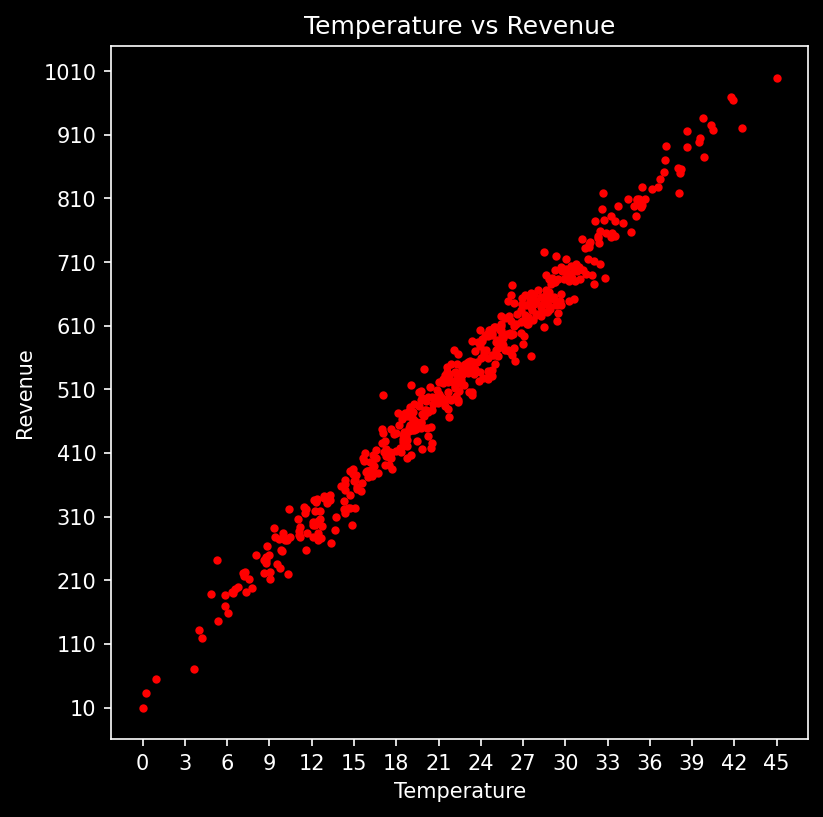

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Temperature = df['Temperature']
Revenue = df['Revenue']
plt.scatter(Temperature, Revenue, marker=MarkerStyle('.'), color='red')
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title('Temperature vs Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.savefig('Images/Temperature_vs_Revenue.png', bbox_inches='tight')

## Split the <b>X</b> and <b>y</b> Dataframes for Test and Training


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Implementation of the Model


In [11]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

## Performance of the Model


In [12]:
print('The coefficient of determination :', r2_score(y_test, y_pred))
adjusted_r2_score = 1-((1-r2_score(y_test, y_pred))*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)
print('The adjusted coefficient of determination :', adjusted_r2_score)

The coefficient of determination : 0.973571215346902
The adjusted coefficient of determination : 0.9730206156666292


## Plotting the Regression


### Training Dataset


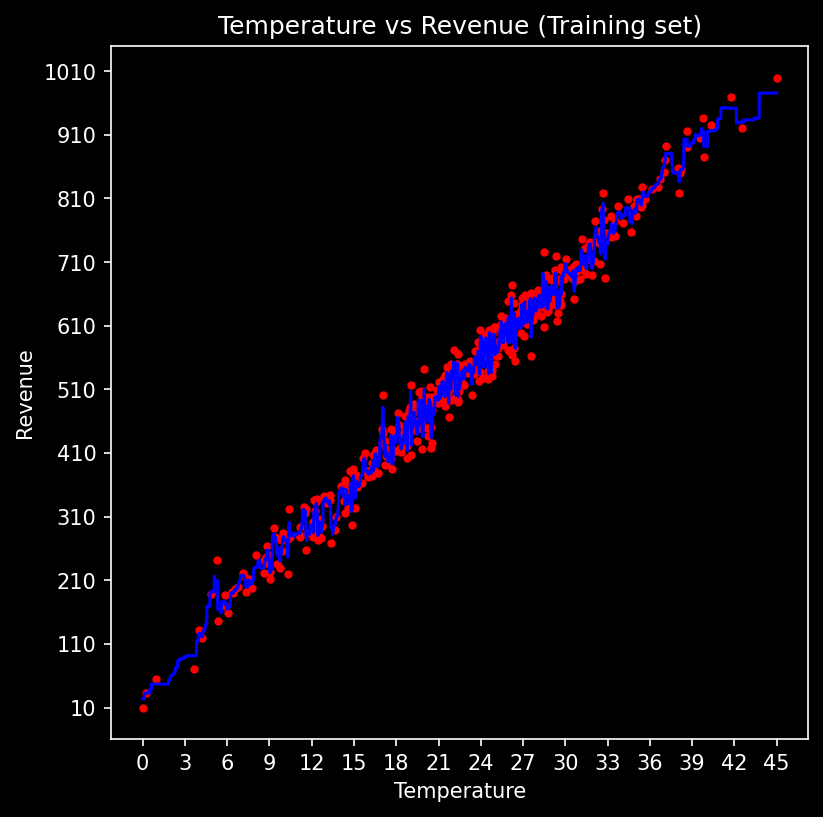

In [13]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
X_train_grid = np.arange(X_train.min(), X_train.max(), 0.01)
X_train_grid = X_train_grid.reshape((len(X_train_grid), 1))
plt.scatter(X_train, y_train, marker=MarkerStyle('.'), color='red')
plt.plot(X_train_grid, rfr.predict(X_train_grid), color='blue')
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title('Temperature vs Revenue (Training set)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.savefig('Images/Training_set.png', bbox_inches='tight')

### Test Dataset


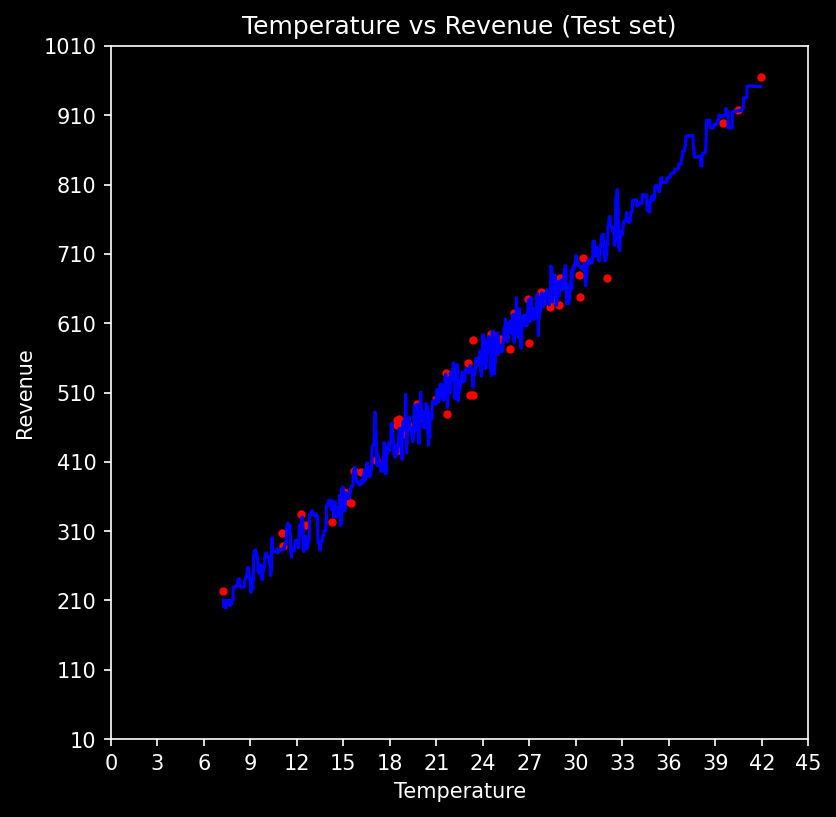

In [14]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
X_test_grid = np.arange(X_test.min(), X_test.max(), 0.01)
X_test_grid = X_test_grid.reshape((len(X_test_grid), 1))
plt.scatter(X_test, y_test, marker=MarkerStyle('.'), color='red')
plt.plot(X_test_grid, rfr.predict(X_test_grid), color='blue')
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title('Temperature vs Revenue (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.savefig('Images/Test_set.png', bbox_inches='tight')

## Additional Performance Metrics


In [15]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Squared Log Error (MSLE) :', mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Log Error (RMSLE) :', mean_squared_log_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE) :', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error (MAE) : 19.84712562904001
Mean Squared Error (MSE) : 646.1827736221854
Root Mean Squared Error (RMSE) : 25.420125365980898
Mean Squared Log Error (MSLE) : 0.002365404786562135
Root Mean Squared Log Error (RMSLE) : 0.0486354272784987
Mean Absolute Percentage Error (MAPE) : 0.03913547706973114


## Saving the Model


In [16]:
dump(rfr, 'randomForestRegressor.joblib')

['randomForestRegressor.joblib']